In [1]:
import mc_agents
import base_agent
import td_agent

from collections import defaultdict
from gym_tictactoe.env import TicTacToeEnv, set_log_level_by, agent_by_mark,\
    next_mark, check_game_status, after_action_state, O_REWARD, X_REWARD

In [2]:
env = TicTacToeEnv(show_number= True)

In [3]:
td_agent.load_model(td_agent.MODEL_FILE)
td_agent_ = td_agent.TDAgent('X',0,0)

base_agent_ = base_agent.BaseAgent('X')

In [10]:
mc_offpolicy = mc_agents.MC_OffPolicy_Weighted_Importance('O',env,0.1)
mu1 = mc_offpolicy.learn(env,50000,td_agent_)

Episode 50000/50000

In [4]:
mc_onpolicy = mc_agents.Mc_OnPolicy('O',0.1,env,1.0)
mu = mc_onpolicy.learn(env,50000,td_agent_)

Episode 50000/50000.

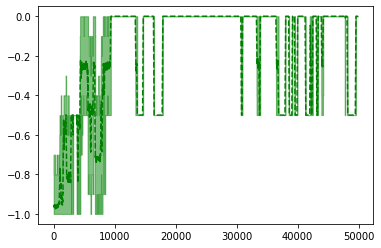

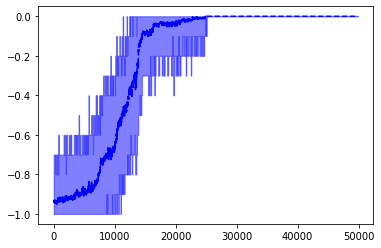

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)

def plotting(returns,window_size = 100):
    averaged_returns = np.zeros(len(returns)-window_size+1)
    max_returns = np.zeros(len(returns)-window_size+1)
    min_returns = np.zeros(len(returns)-window_size+1)
    
    
    for i in range(len(averaged_returns)):
      averaged_returns[i] = np.mean(returns[i:i+window_size])
      max_returns[i] = np.max(returns[i:i+window_size])
      min_returns[i] = np.min(returns[i:i+window_size])
    
#     plt.plot(averaged_returns)
    
#     plot_mean_and_CI(averaged_returns,min_returns,max_returns,'g--','g')
    
    return (averaged_returns,max_returns,min_returns)
    
    
    
    




a = plotting(mu,100)
b = plotting(mu1,100)
plot_mean_and_CI(a[0],a[1],a[2],'g--','g')
plt.show()
plot_mean_and_CI(b[0],b[1],b[2],'b--','b')

plt.show()



In [27]:
mc_agents.play_against(mc_onpolicy,base_agent_,1000)

67.8

In [1]:
import Sarsa
import Q_Learning
import Expected_Sarsa
import frozen_lake
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
env = frozen_lake.FrozenLakeEnv(None,"8x8",True)
env.render()

sarsa_agent = Sarsa.Sarsa(env)
Q_Learning_agent = Q_Learning.Q_Learning(env)
Expected_Sarsa_agent = Expected_Sarsa.Expected_Sarsa(env)

sarsa_agent.learn(env,50000)
Q_Learning_agent.learn(env,50000)
Expected_Sarsa_agent.learn(env,50000)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Episode 50000/50000

In [16]:
def test(env,agent,num_episodes = 1000):
    R = 0.0
    for episode in range(1,num_episodes+1):

        if episode%100 == 0:
            print("\rEpisode {}/{}".format(episode,num_episodes),end = "")
#         R = 0.0
        done = False
        
        state = env.reset()
        action = np.argmax(agent.Q[state])

        while not done:
            next_state,reward,done,_ = env.step(action)
            next_action = np.argmax(agent.Q[next_state])
# 			action = np.random.choice(np.arange(len(probs)),p = probs)
#             print("State = {},Action = {},Q[s][a] = {}".format(state,action,agent.Q[state]))
            
            
            R += reward
            state = next_state
            action = next_action
#             env.render()


    print("")
    print(R/num_episodes)

In [21]:
test(env,sarsa_agent,1000)
test(env,Q_Learning_agent,1000)
test(env,Expected_Sarsa_agent,1000)
# print()

Episode 1000/1000
0.092
Episode 1000/1000
0.013
Episode 1000/1000
0.053
